In [2]:
from utils import *
import numpy as np
from queue import Queue
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
def bfs(img, belong, x0, y0, K):
    m, n, _ = img.shape
    dx = [-1, 0, 0, 1]
    dy = [0, -1, 1, 0]
    q = Queue()
    q.put((x0, y0))
    belong[x0, y0] = K
    while not q.empty():
        x, y = q.get()
        for i in range(4):
            xx = x + dx[i]
            yy = y + dy[i]
            if xx < 0 or xx >= m or yy < 0 or yy >= n:
                continue
            if img[xx, yy].sum() > 0 and belong[xx, yy] ==0:
                q.put((xx, yy))
                belong[xx, yy] = K


def getROI(img):
    m, n, _ = img.shape
    belong = np.zeros((m, n))
    print(belong.shape)
    K = 0
    for i in range(m):
        for j in range(n):
            if img[i, j].sum() > 0 and belong[i, j] == 0:
                K += 1
                bfs(img, belong, i, j, K)
    return (belong, K)

In [4]:
img = read_image('temp.jpg')
print(img.shape)
belong, K = getROI(img)

(693, 1024, 3)
(693, 1024)


In [5]:
num = np.zeros(K + 1).astype(np.int64)
belong = belong.astype(np.int64)
for i in range(belong.shape[0]):
    for j in range(belong.shape[1]):
        if belong[i, j] > 0:
            num[belong[i, j]] += 1

In [6]:
t = num.argmax()
ROI = (belong == t)
f = img * ROI[:, :, None]
g = img * (ROI == False)[:, :, None]

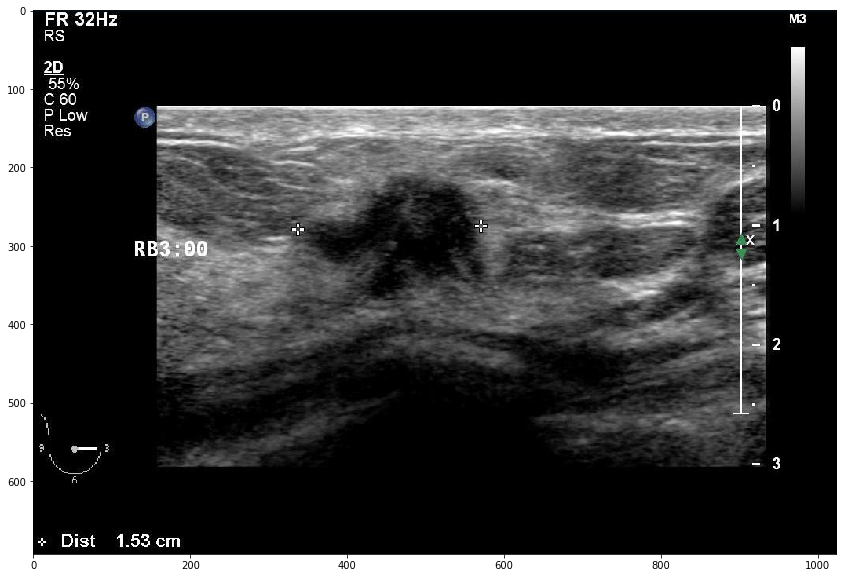

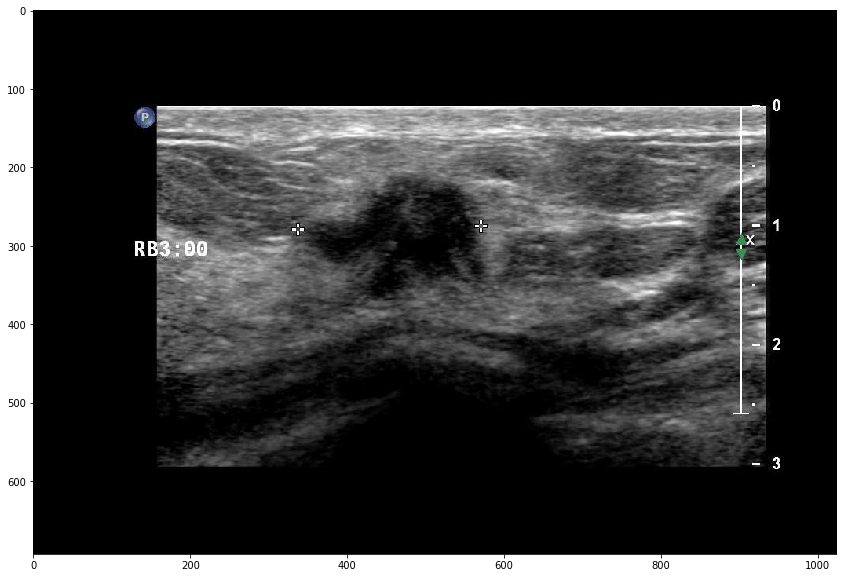

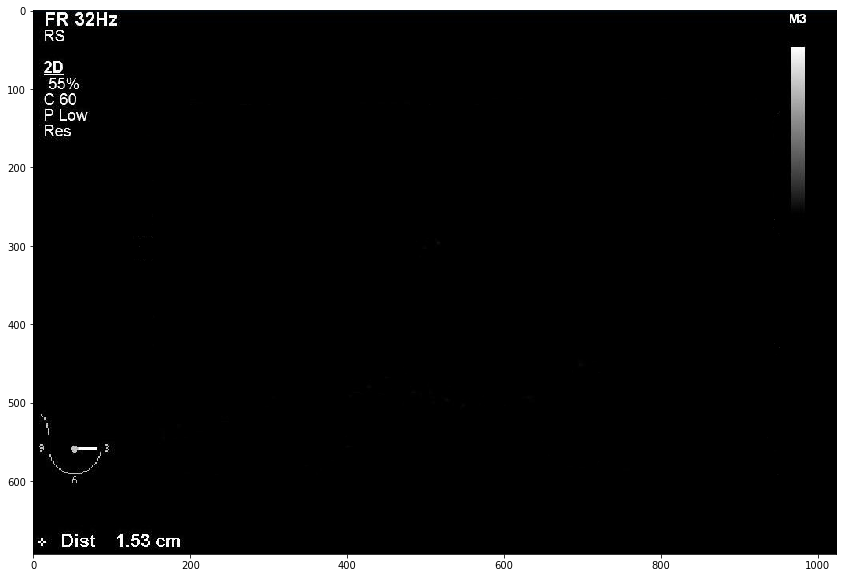

In [7]:
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()
plt.figure(figsize=(15, 10))
plt.imshow(f)
plt.show()
plt.figure(figsize=(15, 10))
plt.imshow(g)
plt.show()

In [8]:
num = np.zeros(256).astype(np.int64)
f_gray = get_gray(f)
g_gray = get_gray(g)
m, n, _ = img.shape
for i in range(m):
    for j in range(n):
        num[g_gray[i, j]] += 1

In [9]:
print(num)

[683761   5423   3810   1953    875    597   1391    430    378    334
    275    269    275    210    228    156    148    152    122    111
     91     85     82     60     65     66     33     44     39     42
     27     44     34     32     17     25      9     27     10     18
     17     21     30     26     11     23     11     25     13     18
     10     27     34     23     21     21    916     23     17     15
     27     18     27     21     19     20     24     34     14     17
     16     13     15     24     10     32      9     19     15     25
     20     28     18     19     12     15     14     28     16     17
      9     18     18     28     13     27     19     20      9     17
     21     30     13      5     26     21     21     18     20     19
     31     14     11     28     21     24     12     22     19     31
     27     16     18     26     11     22     20     13     27     19
     15     21     23     31     24     24     12     20     30      8
     2

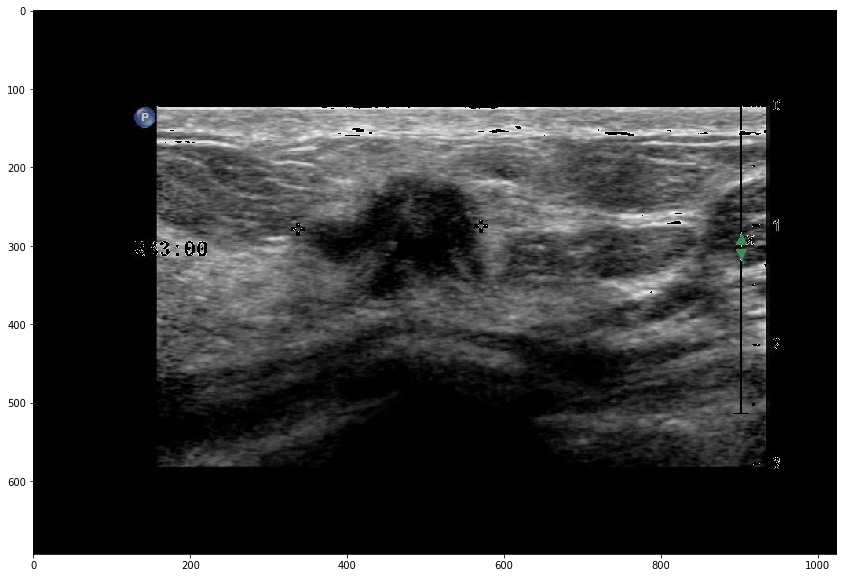

In [10]:
ff = f.copy()
mask1 = (f_gray != 56)
mask2 = (f_gray <= 240)
ff = ff * mask2[:, :, None]
plt.figure(figsize=(15, 10))
plt.imshow(ff)
plt.show()

In [11]:
a, b, c = ff.nonzero()
mask = 1 - mask2
for i in range(m):
    for j in range(n):
        tmp = ff[i, j, 0]
        if ff[i, j, 1] != tmp or ff[i, j, 2] != tmp:
            ff[i, j] = 0
            mask[i, j] = 1

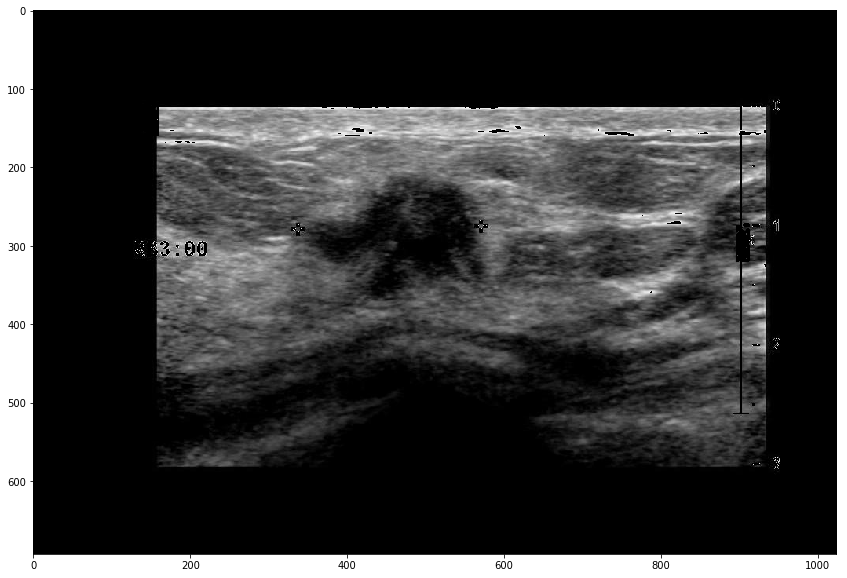

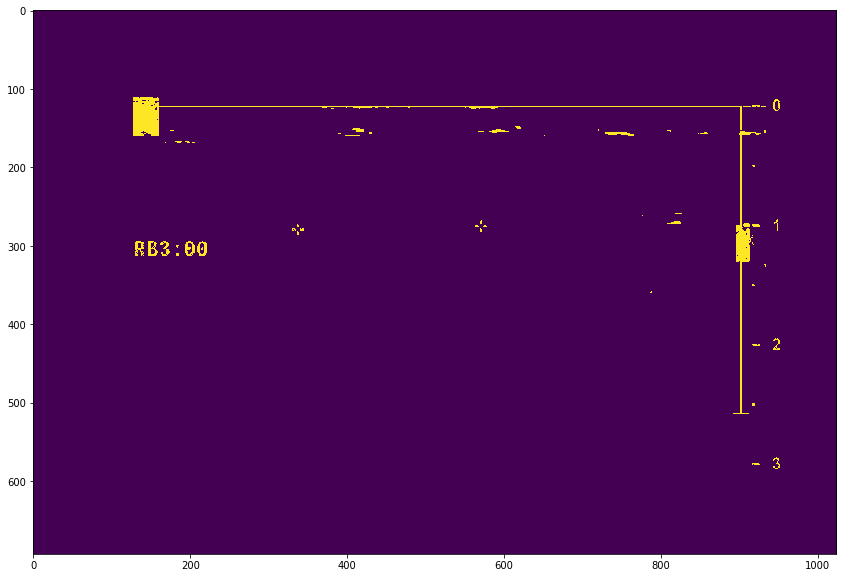

In [12]:
mask[mask!=0] = 255
plt.figure(figsize=(15, 10))
plt.imshow(ff)
plt.show()
plt.figure(figsize=(15, 10))
plt.imshow(mask)
plt.show()

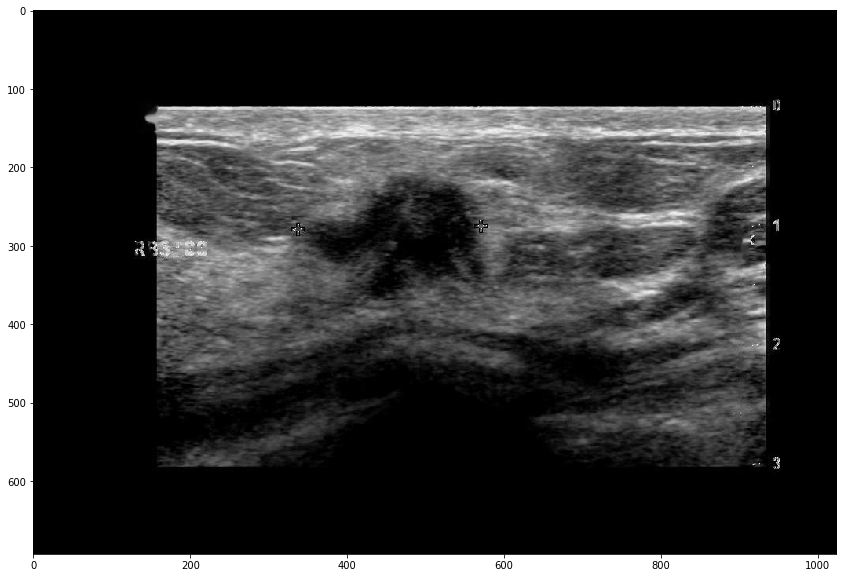

In [13]:
mask = mask.astype(np.uint8)
dst = cv2.inpaint(ff, mask, 3, cv2.INPAINT_NS)
plt.figure(figsize=(15, 10))
plt.imshow(dst)
plt.show()